<a href="https://colab.research.google.com/github/varshanakv/Machine-Learning/blob/main/AQI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AIR QUALITY INDEX(AQI)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [ ]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
# checking missing value

df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
# checking dtypes of each columns

df.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [ ]:
# Removing missing values except AQI,AQI_Bucket(output values)

lst=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene']
for i in lst:
  df[i]=df[i].fillna(df[i].mean())
df.isna().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI           4681
AQI_Bucket    4681
dtype: int64

In [ ]:
df['AQI'].unique()

array([  nan,  209.,  328.,  514.,  782.,  914.,  660.,  294.,  149.,
        190.,  247.,  379.,  341.,  256.,  388.,  288.,  510.,  761.,
        475.,  536.,  479.,  592.,  427.,  588., 1141.,  669., 1247.,
        411.,  292.,  189.,  408.,  383.,  780.,  233.,  297.,  330.,
        252.,  244.,  234.,  219.,  118.,  231.,  286.,  883.,  720.,
        570.,  589.,  818.,  737.,  585.,  616.,  437.,  321.,  372.,
        339.,  324.,  222.,  169.,  220.,  303.,  314.,  378.,  415.,
        126.,  175.,  226.,  315.,  678.,  774.,  285.,  358.,  357.,
        214.,  253.,  239.,  300.,  317.,  240.,  344.,  503.,  308.,
        227.,  120.,  158.,  177.,  201.,  211.,  221.,  481.,  352.,
        327.,  577.,  212.,  280.,  162.,  569.,  128.,  129.,  152.,
        176.,  167.,  106.,  174.,  185.,  179.,  192.,  310.,  223.,
        191.,  184.,  215.,  251.,  216.,  237.,  198.,  195.,  187.,
        181.,  188.,  196.,  230.,  243.,  199.,  200.,  241.,  248.,
        232.,  105.,

In [ ]:
df['AQI_Bucket'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [ ]:
# Removing rows with missing values

df1= df.dropna()

In [ ]:
# Displaying the DataFrame after removing missing values

print("\nDataFrame after removing rows with missing values:")
print(df1)


DataFrame after removing rows with missing values:
                City        Date   PM2.5        PM10     NO    NO2    NOx  \
28         Ahmedabad  2015-01-29   83.13  118.127103   6.93  28.71  33.72   
29         Ahmedabad  2015-01-30   79.84  118.127103  13.85  28.68  41.08   
30         Ahmedabad  2015-01-31   94.52  118.127103  24.39  32.66  52.61   
31         Ahmedabad  2015-02-01  135.99  118.127103  43.48  42.08  84.57   
32         Ahmedabad  2015-02-02  178.33  118.127103  54.56  35.31  72.80   
...              ...         ...     ...         ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27   15.02   50.940000   7.68  25.06  19.54   
29527  Visakhapatnam  2020-06-28   24.38   74.090000   3.42  26.06  16.53   
29528  Visakhapatnam  2020-06-29   22.91   65.730000   3.45  29.53  18.33   
29529  Visakhapatnam  2020-06-30   16.64   49.970000   4.05  29.26  18.80   
29530  Visakhapatnam  2020-07-01   15.00   66.000000   0.40  26.85  14.05   

             NH3     CO

In [ ]:
df1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,59.76,0.02000,0.000000,3.140000,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,97.07,0.04000,0.000000,4.810000,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,111.33,0.24000,0.010000,7.670000,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,102.70,0.40000,0.040000,25.870000,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,118.127103,54.56,35.31,72.80,23.483476,54.56,55.04,107.38,0.46000,0.060000,35.610000,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.0,Satisfactory


In [ ]:
df1.isna().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 28 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        24850 non-null  object 
 1   Date        24850 non-null  object 
 2   PM2.5       24850 non-null  float64
 3   PM10        24850 non-null  float64
 4   NO          24850 non-null  float64
 5   NO2         24850 non-null  float64
 6   NOx         24850 non-null  float64
 7   NH3         24850 non-null  float64
 8   CO          24850 non-null  float64
 9   SO2         24850 non-null  float64
 10  O3          24850 non-null  float64
 11  Benzene     24850 non-null  float64
 12  Toluene     24850 non-null  float64
 13  Xylene      24850 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.7+ MB


In [ ]:
a=df1['City'].value_counts()
a

City
Delhi                 1999
Bengaluru             1910
Lucknow               1893
Chennai               1884
Hyderabad             1880
Patna                 1459
Gurugram              1453
Ahmedabad             1334
Visakhapatnam         1171
Amritsar              1126
Jaipur                1094
Thiruvananthapuram    1052
Amaravati              841
Mumbai                 775
Jorapokhar             771
Kolkata                754
Brajrajnagar           713
Talcher                698
Guwahati               495
Coimbatore             344
Chandigarh             299
Bhopal                 278
Shillong               205
Kochi                  158
Ernakulam              153
Aizawl                 111
Name: count, dtype: int64

In [ ]:
city_lst=list(df1['City'].unique())
city_lst

['Ahmedabad',
 'Aizawl',
 'Amaravati',
 'Amritsar',
 'Bengaluru',
 'Bhopal',
 'Brajrajnagar',
 'Chandigarh',
 'Chennai',
 'Coimbatore',
 'Delhi',
 'Ernakulam',
 'Gurugram',
 'Guwahati',
 'Hyderabad',
 'Jaipur',
 'Jorapokhar',
 'Kochi',
 'Kolkata',
 'Lucknow',
 'Mumbai',
 'Patna',
 'Shillong',
 'Talcher',
 'Thiruvananthapuram',
 'Visakhapatnam']

In [ ]:
city_lst.index('Kochi')

17

<Axes: xlabel='City', ylabel='Count'>

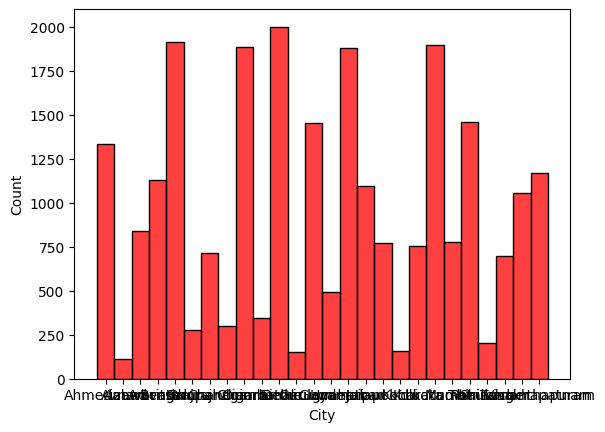

In [ ]:
sns.histplot(x=df1['City'],bins=20,color='red')

In [ ]:
df1['AQI_Bucket'].value_counts()

AQI_Bucket
Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: count, dtype: int64

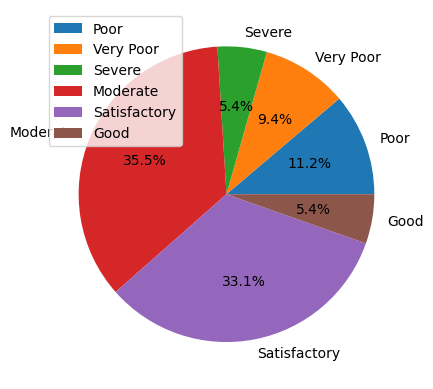

In [ ]:
A=[2781,2337,1338,8829,8224,1341]
mylabel=['Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good']
plt.pie(A,labels=mylabel,autopct='%1.1f%%')
plt.legend()


In [ ]:
# Drop AQI_Bucket

df1.drop(['AQI_Bucket'],axis=1,inplace=True)

<ipython-input-52-74dffb4b302b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['AQI_Bucket'],axis=1,inplace=True)


In [ ]:
# Encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['City']=le.fit_transform(df1['City'])

<ipython-input-53-3eff9e68efce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['City']=le.fit_transform(df1['City'])


In [ ]:
# Converting date from string to datetime format and dividing them into 3 columns

df1['Date']=pd.to_datetime(df1['Date'],format='mixed')
df1['Date']=pd.to_datetime(df1['Date'])
df1['Day']=pd.DatetimeIndex(df1['Date']).day
df1['Month']=pd.DatetimeIndex(df1['Date']).month
df1['Year']=pd.DatetimeIndex(df1['Date']).year

<ipython-input-54-ee92c0d04d94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date']=pd.to_datetime(df1['Date'],format='mixed')
<ipython-input-54-ee92c0d04d94>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date']=pd.to_datetime(df1['Date'])
<ipython-input-54-ee92c0d04d94>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [ ]:
df1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Day,Month,Year
28,0,2015-01-29,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,59.76,0.02000,0.000000,3.140000,209.0,29,1,2015
29,0,2015-01-30,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,97.07,0.04000,0.000000,4.810000,328.0,30,1,2015
30,0,2015-01-31,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,111.33,0.24000,0.010000,7.670000,514.0,31,1,2015
31,0,2015-02-01,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,102.70,0.40000,0.040000,25.870000,782.0,1,2,2015
32,0,2015-02-02,178.33,118.127103,54.56,35.31,72.80,23.483476,54.56,55.04,107.38,0.46000,0.060000,35.610000,914.0,2,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,2020-06-27,15.02,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.0,27,6,2020
29527,25,2020-06-28,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.0,28,6,2020
29528,25,2020-06-29,22.91,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.0,29,6,2020
29529,25,2020-06-30,16.64,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.0,30,6,2020


In [ ]:
df1.dtypes

City                int64
Date       datetime64[ns]
PM2.5             float64
PM10              float64
NO                float64
NO2               float64
NOx               float64
NH3               float64
CO                float64
SO2               float64
O3                float64
Benzene           float64
Toluene           float64
Xylene            float64
AQI               float64
Day                 int32
Month               int32
Year                int32
dtype: object

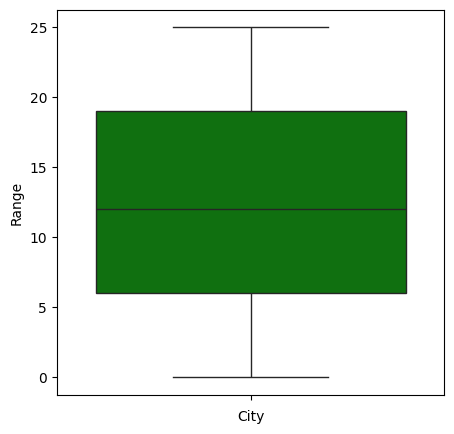

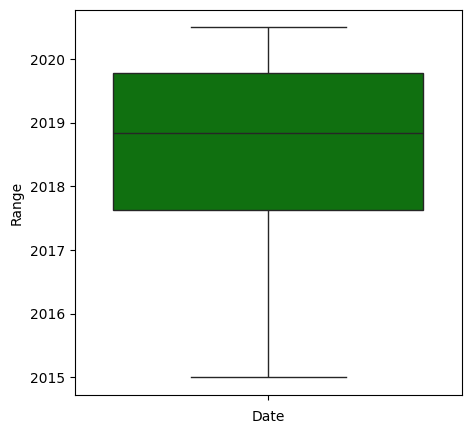

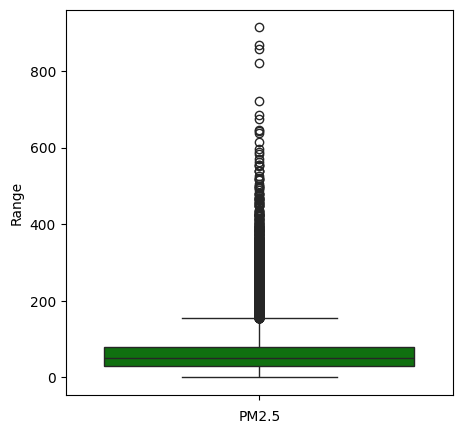

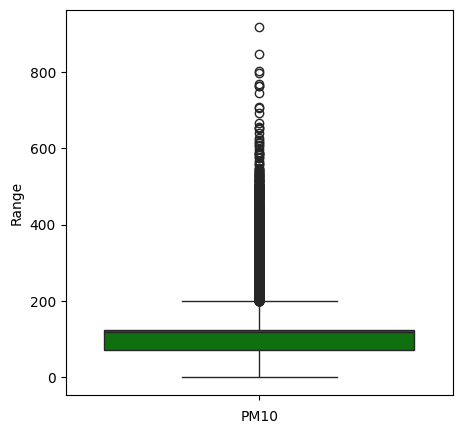

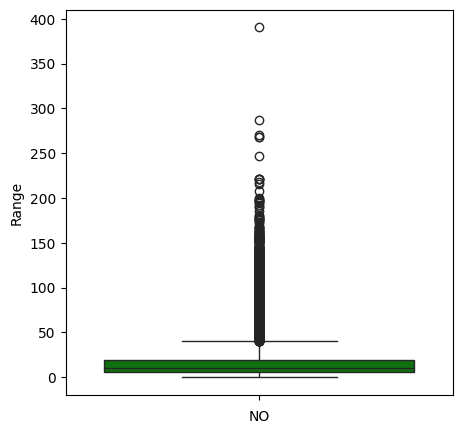

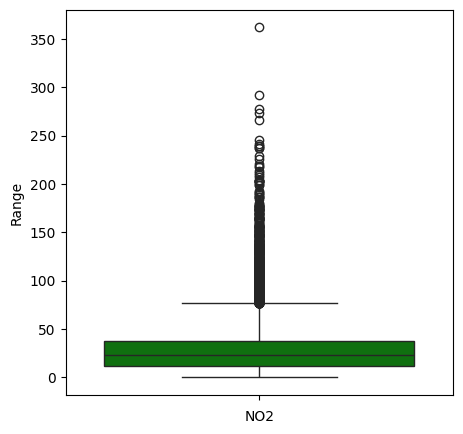

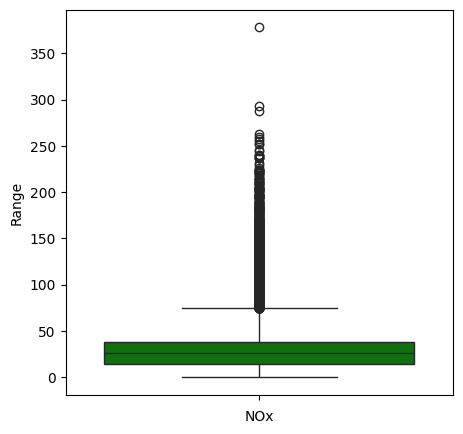

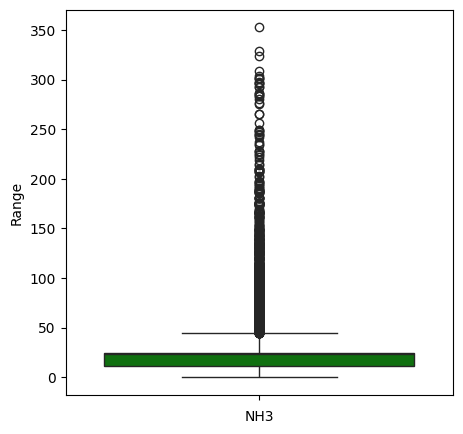

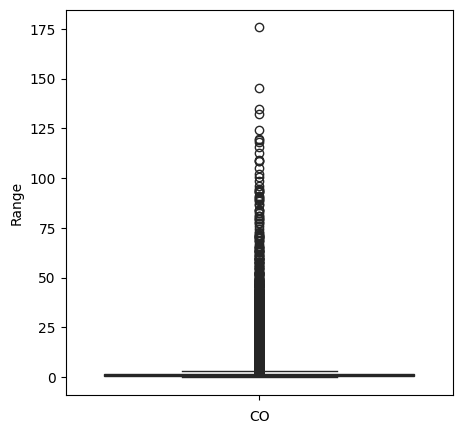

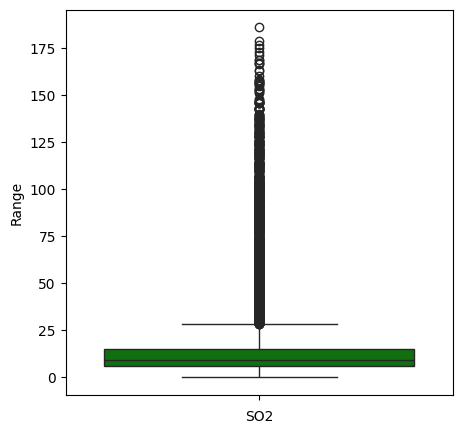

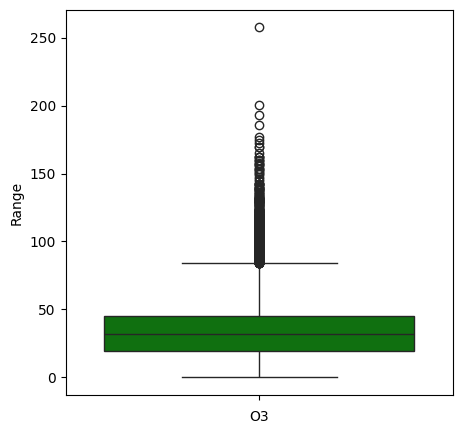

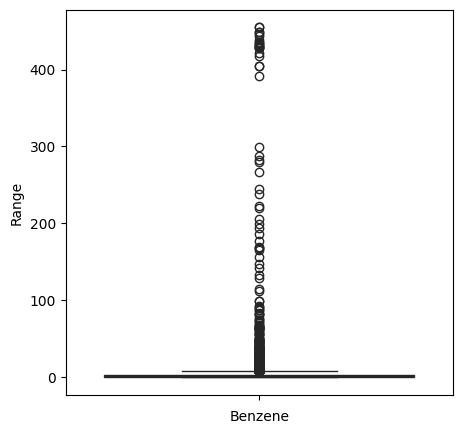

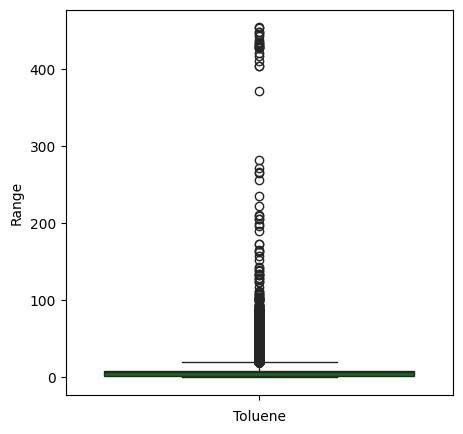

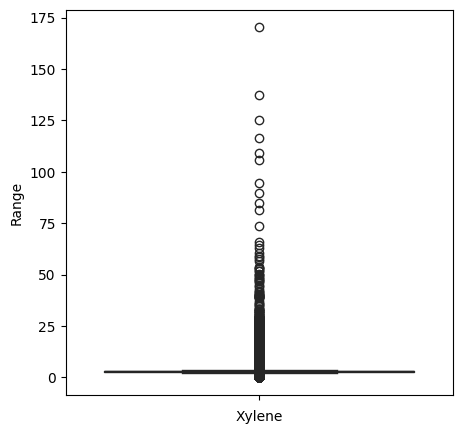

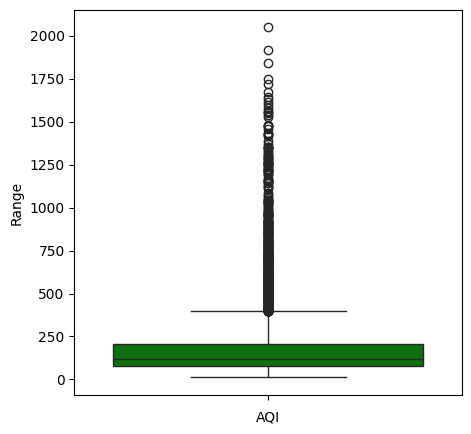

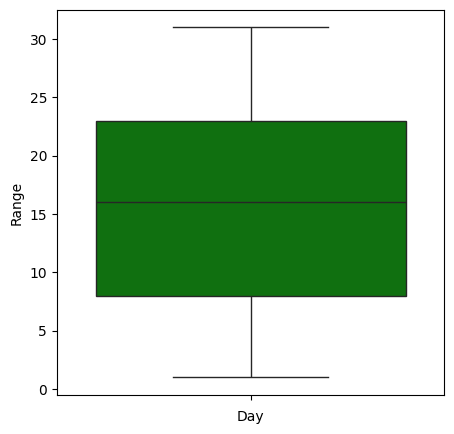

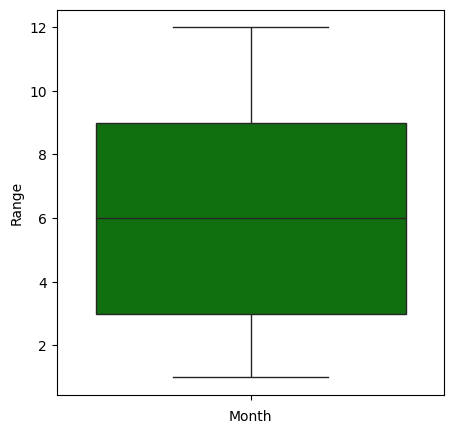

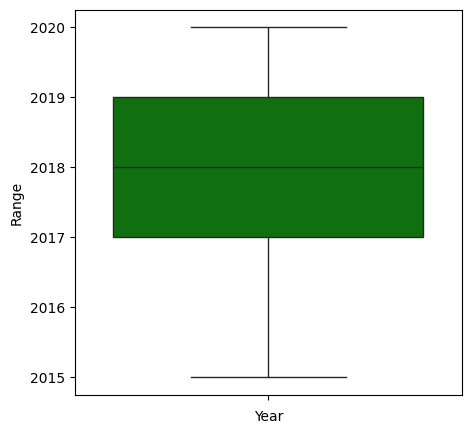

In [ ]:
# Outliers Removing

for i in['City','Date','PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene','AQI','Day','Month','Year']:
 plt.figure(figsize=(5, 5))
 sns.boxplot(df1[i], color='green')
 plt.xlabel(i)
 plt.ylabel('Range')

In [ ]:
def iqr_method(df,variables):
  q1=df1[variables].quantile(0.25)
  q3=df1[variables].quantile(0.75)
  iqr=q3-q1
  upper=q3+(1.5*iqr)
  lower=q1-(1.5*iqr)
  return lower,upper

In [ ]:
# for i in ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
#        'O3', 'Benzene', 'Toluene', 'Xylene']:
#   def iqr_method(df,i):
#     q1=df[i].quantile(0.25)
#     q3=df[i].quantile(0.75)
#     iqr=q3-q1
#     upper=q3+(1.5*iqr)
#     lower=q1-(1.5*iqr)
#     return lower,upper
#   lower_lim,upper_lim=iqr_method(df,i)
#   df[i]=np.where(df[i]>upper_lim,upper_lim,np.where(df[i]<lower_lim,lower_lim,df[i]))

In [ ]:
lower_lim,upper_lim=iqr_method(df1,'PM2.5')
print('lower limit = ',lower_lim)
print('upper limit = ',upper_lim )

lower limit =  -45.36125000000001
upper limit =  154.42875000000004


In [ ]:
df1['PM2.5']=np.where(df1['PM2.5']>upper_lim,upper_lim,
                   np.where(df1['PM2.5']<lower_lim,lower_lim,df1['PM2.5']))

<ipython-input-61-26fb0293cd59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PM2.5']=np.where(df1['PM2.5']>upper_lim,upper_lim,


In [ ]:
lower_lim,upper_lim=iqr_method(df1,'PM10')
print('lower limit = ',lower_lim)
print('upper limit = ',upper_lim )

lower limit =  -4.986249999999984
upper limit =  199.72375


In [ ]:
df1['PM10']=np.where(df1['PM10']>upper_lim,upper_lim,
                   np.where(df1['PM10']<lower_lim,lower_lim,df1['PM10']))

<ipython-input-63-7343f768623b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PM10']=np.where(df1['PM10']>upper_lim,upper_lim,


In [ ]:
lower_lim,upper_lim=iqr_method(df1,'NO')
print('lower limit = ',lower_lim)
print('upper limit = ',upper_lim )

lower limit =  -15.265000000000004
upper limit =  40.69500000000001


In [ ]:
df1['NO']=np.where(df1['NO']>upper_lim,upper_lim,
                   np.where(df1['NO']<lower_lim,lower_lim,df1['NO']))

<ipython-input-65-25ef2a288e45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['NO']=np.where(df1['NO']>upper_lim,upper_lim,


In [ ]:
lower_lim,upper_lim=iqr_method(df1,'NO2')
print('lower limit = ',lower_lim)
print('upper limit = ',upper_lim )

lower limit =  -26.639999999999997
upper limit =  76.63999999999999


In [ ]:
df1['NO2']=np.where(df1['NO2']>upper_lim,upper_lim,
                   np.where(df1['NO2']<lower_lim,lower_lim,df1['NO2']))

<ipython-input-67-bd7ebce8f275>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['NO2']=np.where(df1['NO2']>upper_lim,upper_lim,


In [ ]:
lower_lim,upper_lim=iqr_method(df1,'NOx')
print('lower limit = ',lower_lim)
print('upper limit = ',upper_lim )

lower limit =  -22.18
upper limit =  74.38


In [ ]:
df1['NOx']=np.where(df1['NOx']>upper_lim,upper_lim,
                   np.where(df1['NOx']<lower_lim,lower_lim,df1['NOx']))

<ipython-input-69-eae59ab32340>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['NOx']=np.where(df1['NOx']>upper_lim,upper_lim,


In [ ]:
lower_lim,upper_lim=iqr_method(df1,'NH3')
print('lower limit = ',lower_lim)
print('upper limit = ',upper_lim )

lower limit =  -8.865000000000004
upper limit =  44.855000000000004


In [ ]:
df1['NH3']=np.where(df1['NH3']>upper_lim,upper_lim,
                   np.where(df1['NH3']<lower_lim,lower_lim,df1['NH3']))

<ipython-input-71-3f63db5c96a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['NH3']=np.where(df1['NH3']>upper_lim,upper_lim,


In [ ]:
lower_lim,upper_lim=iqr_method(df1,'CO')
print('lower limit = ',lower_lim)
print('upper limit = ',upper_lim )

lower limit =  -0.8200000000000002
upper limit =  2.9400000000000004


In [ ]:
df1['CO']=np.where(df1['CO']>upper_lim,upper_lim,
                   np.where(df1['CO']<lower_lim,lower_lim,df1['CO']))

<ipython-input-73-6352b4851ef7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CO']=np.where(df1['CO']>upper_lim,upper_lim,


In [ ]:
lower_lim,upper_lim=iqr_method(df1,'SO2')
print('lower limit = ',lower_lim)
print('upper limit = ',upper_lim )

lower limit =  -7.860000000000002
upper limit =  28.540000000000003


In [ ]:
df1['SO2']=np.where(df1['SO2']>upper_lim,upper_lim,
                   np.where(df1['SO2']<lower_lim,lower_lim,df1['SO2']))

<ipython-input-75-b315640b17d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['SO2']=np.where(df1['SO2']>upper_lim,upper_lim,


In [ ]:
lower_lim,upper_lim=iqr_method(df1,'O3')
print('lower limit = ',lower_lim)
print('upper limit = ',upper_lim )

lower limit =  -18.996250000000003
upper limit =  84.03375


In [ ]:
df1['O3']=np.where(df1['O3']>upper_lim,upper_lim,
                   np.where(df1['O3']<lower_lim,lower_lim,df1['O3']))

<ipython-input-77-08ac31a11abf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['O3']=np.where(df1['O3']>upper_lim,upper_lim,


In [ ]:
lower_lim,upper_lim=iqr_method(df1,'Benzene')
print('lower limit = ',lower_lim)
print('upper limit = ',upper_lim )

lower limit =  -4.071260456750878
upper limit =  7.692100761251463


In [ ]:
df1['Benzene']=np.where(df1['Benzene']>upper_lim,upper_lim,
                   np.where(df1['Benzene']<lower_lim,lower_lim,df1['Benzene']))

<ipython-input-79-00a1fdd1eb2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Benzene']=np.where(df1['Benzene']>upper_lim,upper_lim,


In [ ]:
lower_lim,upper_lim=iqr_method(df1,'Toluene')
print('lower limit = ',lower_lim)
print('upper limit = ',upper_lim )

lower limit =  -9.10145812005584
upper limit =  19.38243020009307


In [ ]:
df1['Toluene']=np.where(df1['Toluene']>upper_lim,upper_lim,
                   np.where(df1['Toluene']<lower_lim,lower_lim,df1['Toluene']))

<ipython-input-81-ff092ddbd76f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Toluene']=np.where(df1['Toluene']>upper_lim,upper_lim,


In [ ]:
lower_lim,upper_lim=iqr_method(df1,'Xylene')
print('lower limit = ',lower_lim)
print('upper limit = ',upper_lim )

lower limit =  2.019808264752233
upper limit =  3.700319558746279


In [ ]:
df1['Xylene']=np.where(df1['Xylene']>upper_lim,upper_lim,
                   np.where(df1['Xylene']<lower_lim,lower_lim,df1['Xylene']))

<ipython-input-83-a419d9bcf375>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Xylene']=np.where(df1['Xylene']>upper_lim,upper_lim,


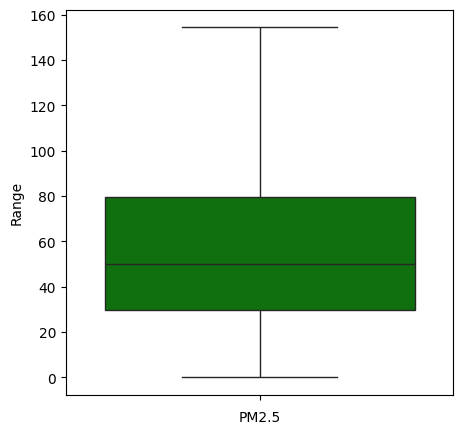

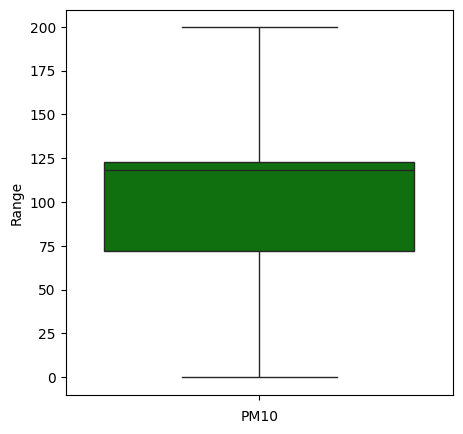

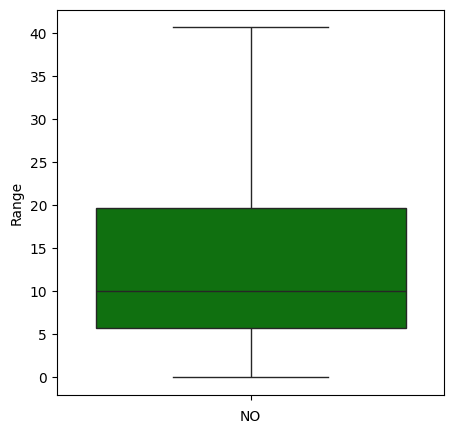

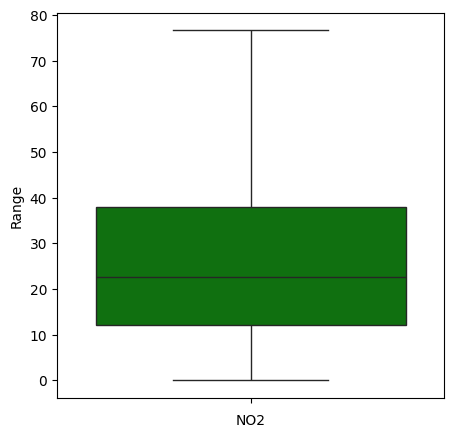

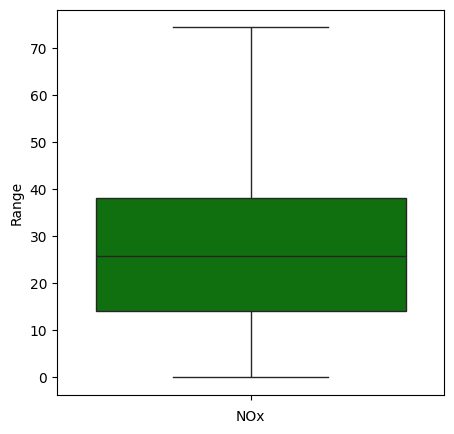

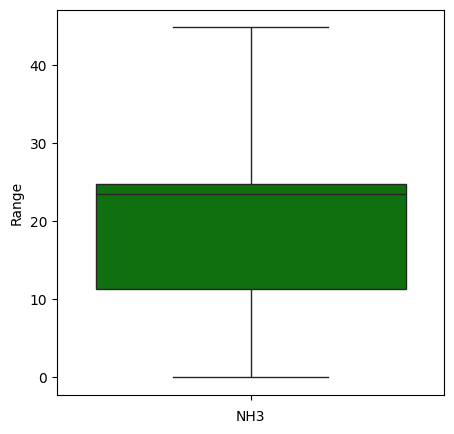

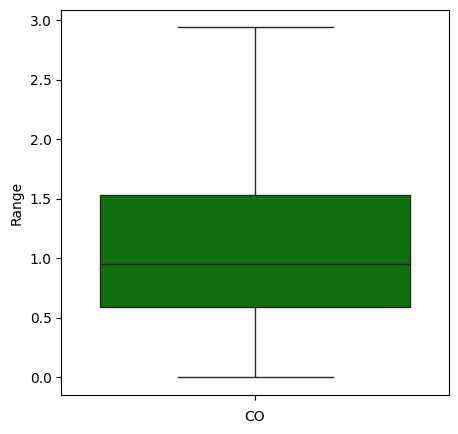

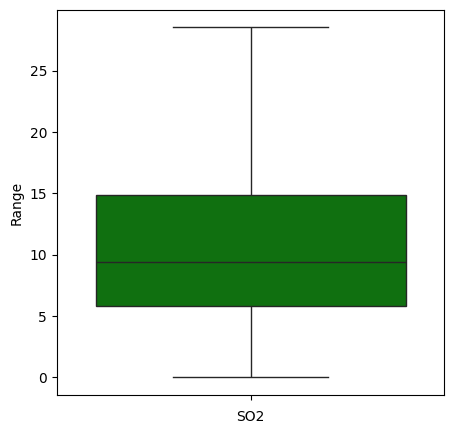

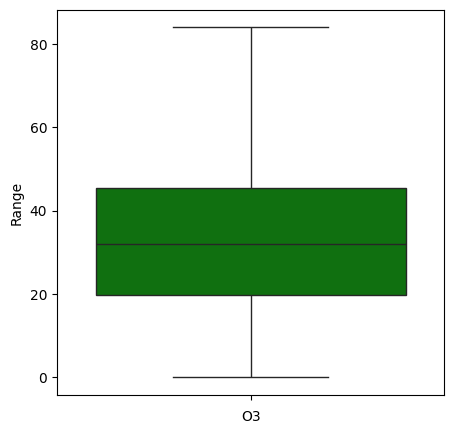

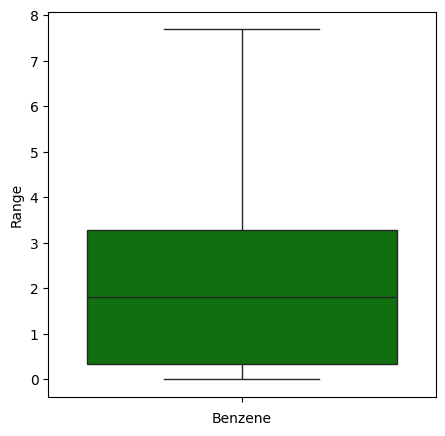

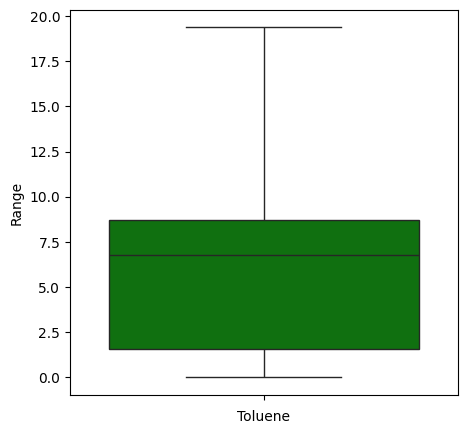

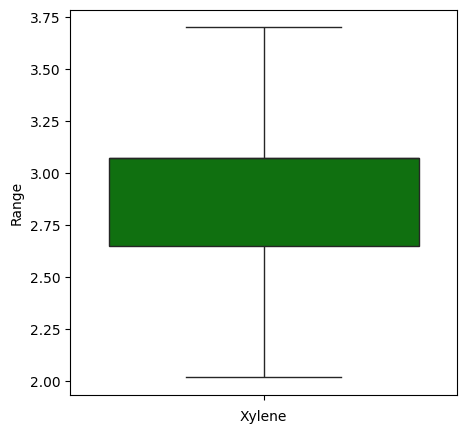

In [ ]:
for i in['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene']:
 plt.figure(figsize=(5, 5))
 sns.boxplot(df1[i], color='green')
 plt.xlabel(i)
 plt.ylabel('Range')

In [ ]:
# Correlation

df1.corr()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Day,Month,Year
City,1.000000,0.075002,0.073891,-0.022258,0.060320,-0.042308,0.015166,-0.229532,-0.084678,-0.005930,0.016712,0.038353,0.070082,0.048686,-0.123456,-0.000299,0.002800,0.072040
Date,0.075002,1.000000,-0.246975,-0.224731,-0.008197,-0.097489,0.015495,-0.251895,-0.238920,0.088595,-0.045816,0.000595,0.092552,-0.015552,-0.194272,0.011531,-0.068040,0.981064
PM2.5,0.073891,-0.246975,1.000000,0.658335,0.466957,0.445045,0.457558,0.338747,0.359557,0.249922,0.204227,0.186737,0.212178,0.061560,0.686751,-0.009900,0.015124,-0.242165
PM10,-0.022258,-0.224731,0.658335,1.000000,0.439296,0.432332,0.462985,0.356515,0.283735,0.300305,0.228894,0.207871,0.235793,0.066970,0.488254,-0.019933,-0.039457,-0.209782
NO,0.060320,-0.008197,0.466957,0.439296,1.000000,0.524246,0.782625,0.274503,0.331133,0.328676,-0.019180,0.247764,0.249412,0.069542,0.480936,-0.011510,0.040624,-0.015790
NO2,-0.042308,-0.097489,0.445045,0.432332,0.524246,1.000000,0.631716,0.354077,0.274270,0.326651,0.311089,0.283557,0.358713,0.057881,0.491226,-0.007430,0.038663,-0.101948
NOx,0.015166,0.015495,0.457558,0.462985,0.782625,0.631716,1.000000,0.251812,0.326502,0.298132,0.068394,0.286943,0.305643,0.066658,0.471938,-0.009559,0.024951,0.010166
NH3,-0.229532,-0.251895,0.338747,0.356515,0.274503,0.354077,0.251812,1.000000,0.177118,0.059112,0.148014,0.028390,0.061734,0.000818,0.256512,-0.000818,0.003851,-0.244691
CO,-0.084678,-0.238920,0.359557,0.283735,0.331133,0.274270,0.326502,0.177118,1.000000,0.326294,0.056187,0.174730,0.296771,0.080613,0.545824,-0.010018,0.038932,-0.238694
SO2,-0.005930,0.088595,0.249922,0.300305,0.328676,0.326651,0.298132,0.059112,0.326294,1.000000,0.210731,0.179457,0.366525,0.077182,0.399391,0.002018,-0.038046,0.093063


<Axes: >

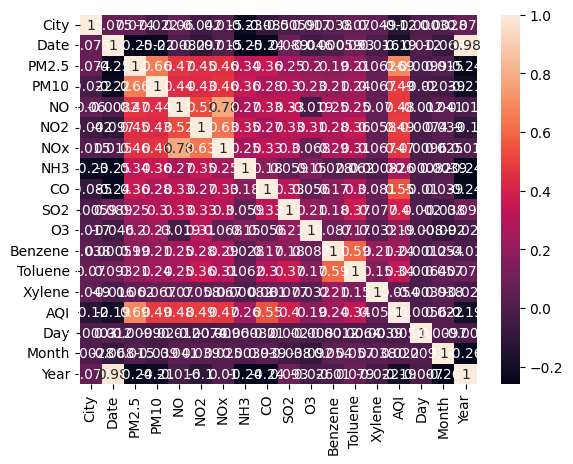

In [ ]:
sns.heatmap(df1.corr(),annot=True)

In [ ]:
df1.drop(['Date','Day'],axis=1,inplace=True)

<ipython-input-87-975afa160e3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Date','Day'],axis=1,inplace=True)


In [ ]:
# X & Y Spliting

y=df1['AQI'].values
y

array([209., 328., 514., ...,  68.,  54.,  50.])

In [ ]:
x=df1.drop(['AQI'],axis=1)
x

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,Month,Year
28,0,83.13000,118.127103,6.930,28.71,33.72,23.483476,2.94,28.54,59.76000,0.02000,0.000000,3.140000,1,2015
29,0,79.84000,118.127103,13.850,28.68,41.08,23.483476,2.94,28.54,84.03375,0.04000,0.000000,3.700320,1,2015
30,0,94.52000,118.127103,24.390,32.66,52.61,23.483476,2.94,28.54,84.03375,0.24000,0.010000,3.700320,1,2015
31,0,135.99000,118.127103,40.695,42.08,74.38,23.483476,2.94,28.54,84.03375,0.40000,0.040000,3.700320,2,2015
32,0,154.42875,118.127103,40.695,35.31,72.80,23.483476,2.94,28.54,84.03375,0.46000,0.060000,3.700320,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,15.02000,50.940000,7.680,25.06,19.54,12.470000,0.47,8.55,23.30000,2.24000,12.070000,2.019808,6,2020
29527,25,24.38000,74.090000,3.420,26.06,16.53,11.990000,0.52,12.72,30.14000,0.74000,2.210000,2.019808,6,2020
29528,25,22.91000,65.730000,3.450,29.53,18.33,10.710000,0.48,8.42,30.96000,0.01000,0.010000,2.019808,6,2020
29529,25,16.64000,49.970000,4.050,29.26,18.80,10.030000,0.52,9.84,28.30000,0.00000,0.000000,2.019808,6,2020


In [ ]:
x=x.values
x

array([[0.00000000e+00, 8.31300000e+01, 1.18127103e+02, ...,
        3.14000000e+00, 1.00000000e+00, 2.01500000e+03],
       [0.00000000e+00, 7.98400000e+01, 1.18127103e+02, ...,
        3.70031956e+00, 1.00000000e+00, 2.01500000e+03],
       [0.00000000e+00, 9.45200000e+01, 1.18127103e+02, ...,
        3.70031956e+00, 1.00000000e+00, 2.01500000e+03],
       ...,
       [2.50000000e+01, 2.29100000e+01, 6.57300000e+01, ...,
        2.01980826e+00, 6.00000000e+00, 2.02000000e+03],
       [2.50000000e+01, 1.66400000e+01, 4.99700000e+01, ...,
        2.01980826e+00, 6.00000000e+00, 2.02000000e+03],
       [2.50000000e+01, 1.50000000e+01, 6.60000000e+01, ...,
        3.07012782e+00, 7.00000000e+00, 2.02000000e+03]])

<Axes: xlabel='City'>

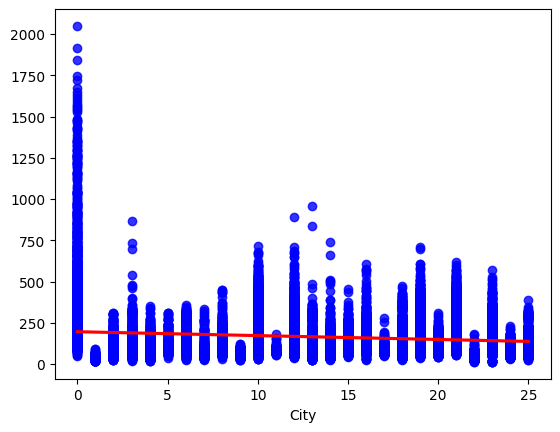

In [ ]:
sns.regplot(x=df1['City'],y=y,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

<Axes: xlabel='PM2.5'>

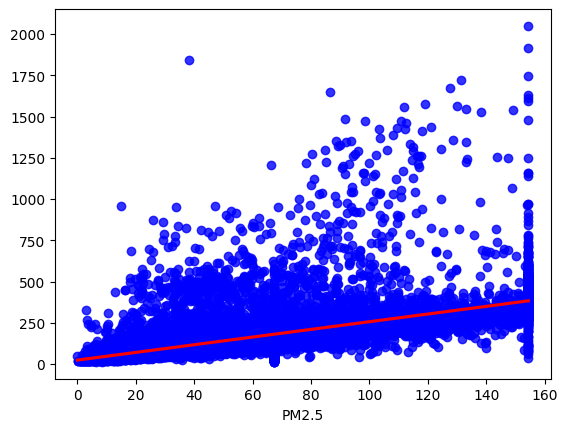

In [ ]:
sns.regplot(x=df1['PM2.5'],y=y,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

<Axes: xlabel='PM10'>

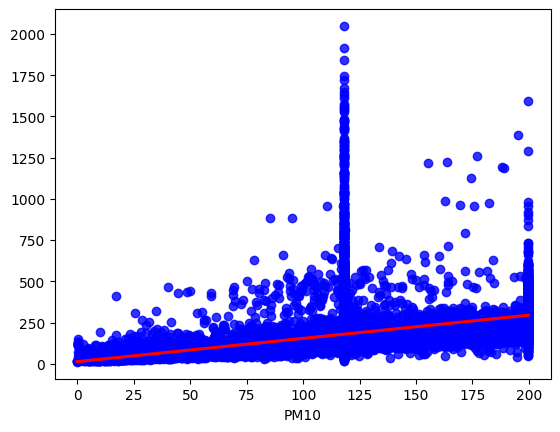

In [ ]:
sns.regplot(x=df1['PM10'],y=y,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

<Axes: xlabel='NO'>

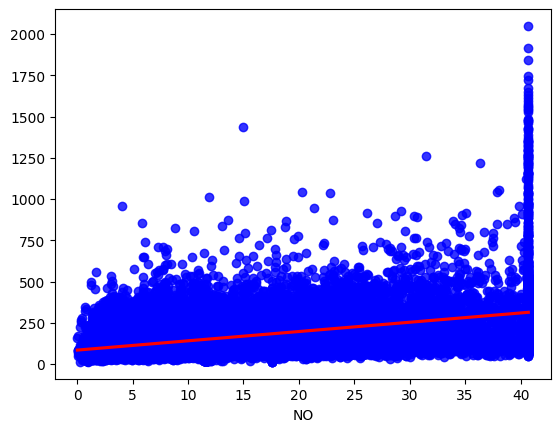

In [ ]:
sns.regplot(x=df1['NO'],y=y,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

<Axes: xlabel='NO2'>

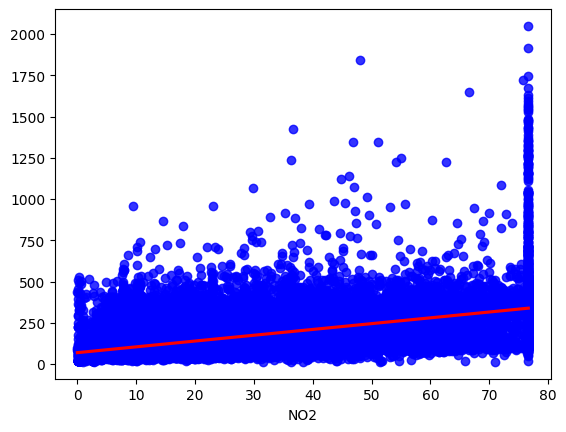

In [ ]:
sns.regplot(x=df1['NO2'],y=y,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

<Axes: xlabel='NOx'>

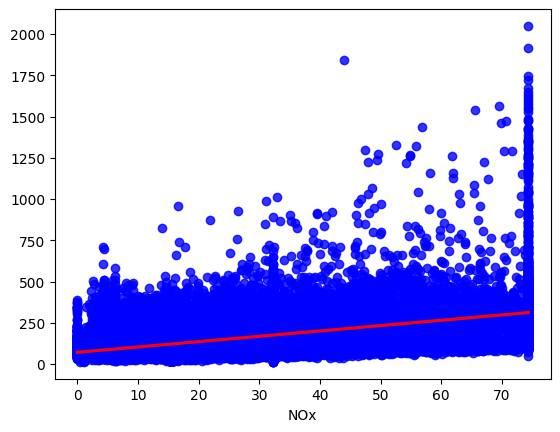

In [ ]:
sns.regplot(x=df1['NOx'],y=y,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

<Axes: xlabel='NH3'>

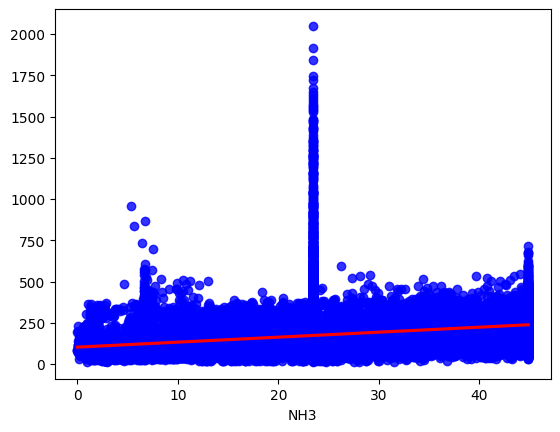

In [ ]:
sns.regplot(x=df1['NH3'],y=y,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

<Axes: xlabel='CO'>

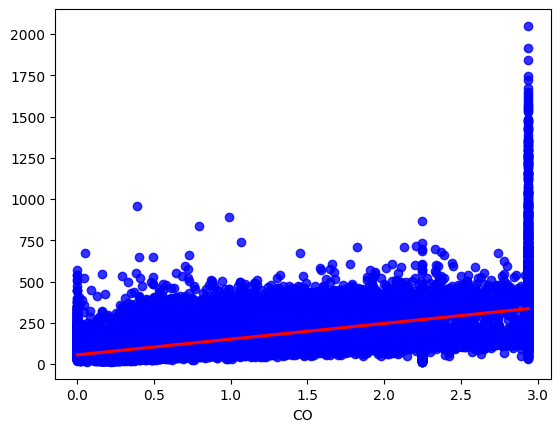

In [ ]:
sns.regplot(x=df1['CO'],y=y,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

<Axes: xlabel='SO2'>

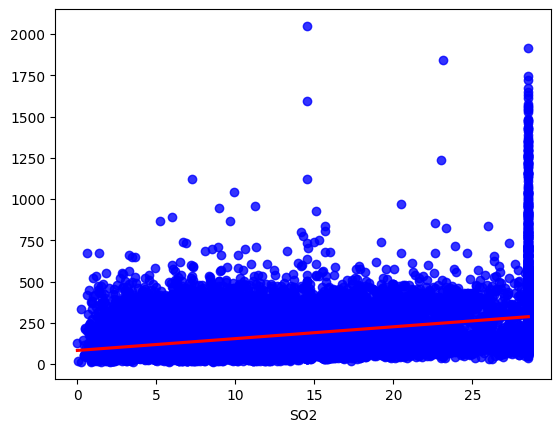

In [ ]:
sns.regplot(x=df1['SO2'],y=y,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

<Axes: xlabel='O3'>

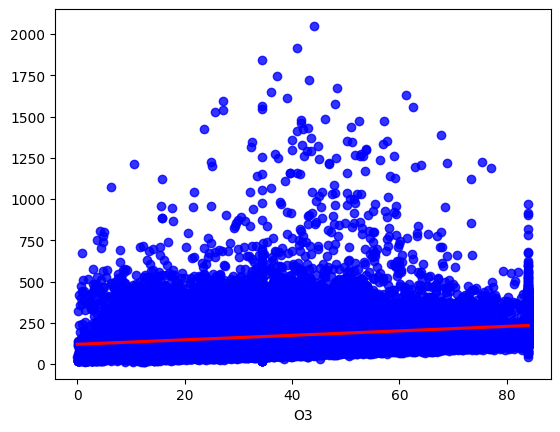

In [ ]:
sns.regplot(x=df1['O3'],y=y,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

<Axes: xlabel='Benzene'>

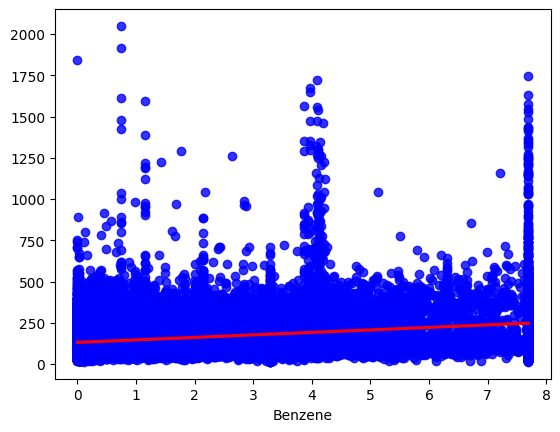

In [ ]:
sns.regplot(x=df1['Benzene'],y=y,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

<Axes: xlabel='Toluene'>

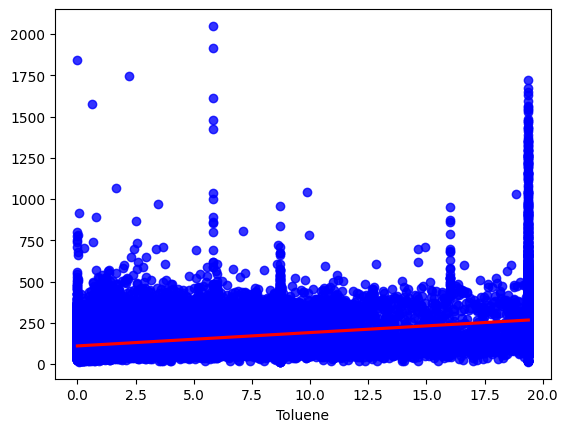

In [ ]:
sns.regplot(x=df1['Toluene'],y=y,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

<Axes: xlabel='Xylene'>

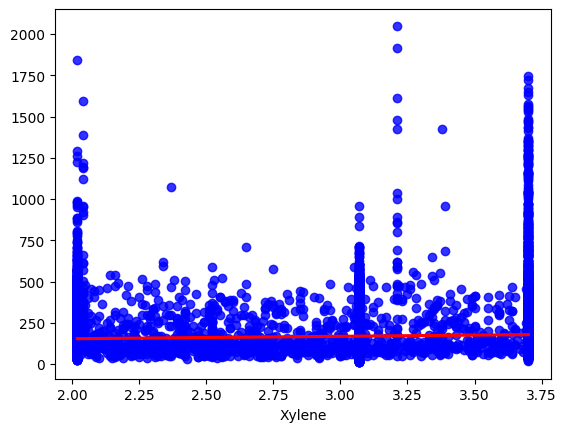

In [ ]:
sns.regplot(x=df1['Xylene'],y=y,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

<Axes: xlabel='Month'>

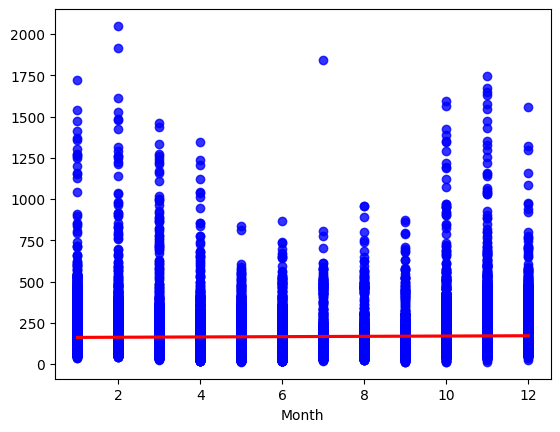

In [ ]:
sns.regplot(x=df1['Month'],y=y,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

<Axes: xlabel='Year'>

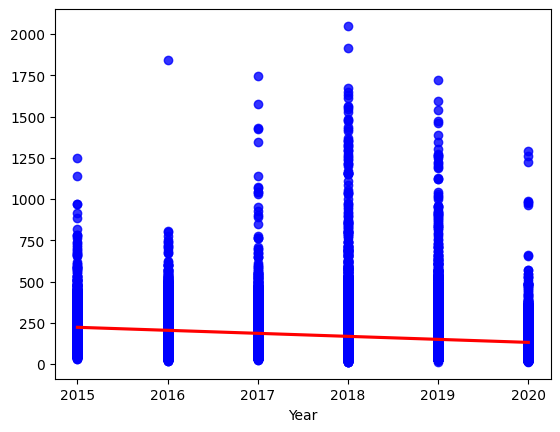

In [ ]:
sns.regplot(x=df1['Year'],y=y,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [ ]:
# Train & Test Data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.99,random_state=42)

In [ ]:
x_train

array([[1.50000000e+01, 4.99200000e+01, 1.45620000e+02, ...,
        3.07012782e+00, 3.00000000e+00, 2.01800000e+03],
       [1.20000000e+01, 4.44600000e+01, 1.18127103e+02, ...,
        3.07012782e+00, 8.00000000e+00, 2.01800000e+03],
       [2.00000000e+00, 3.23300000e+01, 7.84000000e+01, ...,
        2.01980826e+00, 5.00000000e+00, 2.01900000e+03],
       ...,
       [0.00000000e+00, 6.45000000e+01, 1.18127103e+02, ...,
        3.70031956e+00, 2.00000000e+00, 2.01900000e+03],
       [1.50000000e+01, 2.94600000e+01, 6.48200000e+01, ...,
        3.07012782e+00, 3.00000000e+00, 2.02000000e+03],
       [2.40000000e+01, 1.01500000e+01, 1.18127103e+02, ...,
        3.07012782e+00, 6.00000000e+00, 2.02000000e+03]])

In [ ]:
x_test

array([[8.00000000e+00, 4.23700000e+01, 1.18127103e+02, ...,
        3.07012782e+00, 9.00000000e+00, 2.01600000e+03],
       [2.00000000e+01, 9.23700000e+01, 1.67920000e+02, ...,
        3.07012782e+00, 1.10000000e+01, 2.01900000e+03],
       [3.00000000e+00, 5.74600000e+01, 8.29900000e+01, ...,
        2.01980826e+00, 1.00000000e+00, 2.02000000e+03],
       ...,
       [2.10000000e+01, 1.54428750e+02, 1.18127103e+02, ...,
        2.01980826e+00, 1.20000000e+01, 2.01600000e+03],
       [1.00000000e+01, 1.05510000e+02, 1.99723750e+02, ...,
        3.07012782e+00, 5.00000000e+00, 2.01600000e+03],
       [2.40000000e+01, 1.99300000e+01, 4.18100000e+01, ...,
        3.07012782e+00, 8.00000000e+00, 2.01700000e+03]])

In [ ]:
y_train

array([140.,  72., 104.,  82., 302.,  76., 247., 279.,  63., 120., 174.,
       302., 109., 302.,  60., 102.,  41.,  81.,  97., 346., 140., 102.,
        54.,  76.,  94., 108., 895., 135.,  70., 142., 356., 181.,  89.,
        58., 142., 159.,  47., 211.,  54.,  53., 342., 125., 102.,  75.,
       324.,  87.,  28., 470., 160., 113., 446., 122., 425.,  58., 185.,
       168.,  86., 152., 122., 328., 193., 140., 433., 136.,  53., 108.,
       117.,  97., 139., 695., 248., 112.,  73.,  78., 154., 112.,  80.,
       378., 313.,  57., 398.,  93.,  82., 111.,  69., 117.,  89., 149.,
       322.,  96., 155., 332.,  86., 113.,  74.,  91., 100., 119., 270.,
        71.,  66.,  87., 348., 301., 346.,  53.,  88., 117., 460.,  90.,
       235.,  51.,  60., 119., 208., 146.,  39.,  83.,  95., 112., 101.,
       402., 117.,  63.,  69.,  81.,  92.,  95.,  62., 116., 123., 238.,
       280.,  37., 108., 538., 141., 103.,  62., 107., 158.,  51.,  86.,
       127., 100., 271.,  93.,  75.,  70., 188.,  9

In [ ]:
y_test

array([141., 209., 111., ..., 500., 307.,  63.])

In [ ]:

# Model Selection

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
knn=KNeighborsRegressor(n_neighbors=7)
linear=LinearRegression()
tree=DecisionTreeRegressor()
forest=RandomForestRegressor()
lst=[knn,linear,tree,forest]

In [ ]:
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("model is",i)
  print(y_pred)
  print("percentage erreor is",mean_absolute_percentage_error(y_test,y_pred))
  print("r2score is",r2_score(y_test,y_pred))
  print("*"*60)
  print()

model is KNeighborsRegressor(n_neighbors=7)
[102.28571429 215.57142857 108.85714286 ... 364.14285714 313.
  60.28571429]
percentage erreor is 0.2530153938567725
r2score is 0.6270311484493524
************************************************************

model is LinearRegression()
[104.718042   190.94874717 152.08497701 ... 346.01232267 345.70719406
   6.18693016]
percentage erreor is 0.3986663925196764
r2score is 0.6316046950682409
************************************************************

model is DecisionTreeRegressor()
[ 92. 221. 102. ... 346. 208.  62.]
percentage erreor is 0.2784220685484985
r2score is 0.575481681258813
************************************************************

model is RandomForestRegressor()
[ 97.91 215.29 107.41 ... 358.95 260.69  64.74]
percentage erreor is 0.2259106884692841
r2score is 0.7491623021708814
************************************************************



In [ ]:
# hyperparameter tuning

# from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# param_grid = {
#     'criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
#     'n_estimators': [25, 50, 100, 150],
#     'max_features': ['sqrt', 'log2', None],
#     'max_depth': [3, 6, 9],
#     'max_leaf_nodes': [3, 6, 9],
#     }

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# grid_search = GridSearchCV(RandomForestRegressor(),
#                             param_grid=param_grid)
# grid_search.fit(x_train,y_train)
# print(grid_search.best_estimator_)

In [ ]:
# Model Creation

from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(criterion='friedman_mse', max_depth=9, max_features=None,
                      max_leaf_nodes=9, n_estimators=25)
forest.fit(x_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=9, max_features=None,
                      max_leaf_nodes=9, n_estimators=25)

In [ ]:
y_pred=forest.predict(x_test)
print("Model is RandomForestRegressor")
print("*"*40)
print(y_pred)

Model is RandomForestRegressor
****************************************
[106.96838849 219.6870163  113.03290809 ... 363.11004744 279.09260612
  70.7869469 ]


In [ ]:
error=y_test-y_pred
error

array([ 34.03161151, -10.6870163 ,  -2.03290809, ..., 136.88995256,
        27.90739388,  -7.7869469 ])

In [ ]:
df2=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':error})
df2

,Actual_value,Predicted_value,Difference
0,141.0,106.968388,34.031612
1,209.0,219.687016,-10.687016
2,111.0,113.032908,-2.032908
3,124.0,106.968388,17.031612
4,81.0,79.924377,1.075623
...,...,...,...
24597,342.0,401.664889,-59.664889
24598,302.0,279.051632,22.948368
24599,500.0,363.110047,136.889953
24600,307.0,279.092606,27.907394


In [ ]:
df1

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Month,Year
28,0,83.13000,118.127103,6.930,28.71,33.72,23.483476,2.94,28.54,59.76000,0.02000,0.000000,3.140000,209.0,1,2015
29,0,79.84000,118.127103,13.850,28.68,41.08,23.483476,2.94,28.54,84.03375,0.04000,0.000000,3.700320,328.0,1,2015
30,0,94.52000,118.127103,24.390,32.66,52.61,23.483476,2.94,28.54,84.03375,0.24000,0.010000,3.700320,514.0,1,2015
31,0,135.99000,118.127103,40.695,42.08,74.38,23.483476,2.94,28.54,84.03375,0.40000,0.040000,3.700320,782.0,2,2015
32,0,154.42875,118.127103,40.695,35.31,72.80,23.483476,2.94,28.54,84.03375,0.46000,0.060000,3.700320,914.0,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,15.02000,50.940000,7.680,25.06,19.54,12.470000,0.47,8.55,23.30000,2.24000,12.070000,2.019808,41.0,6,2020
29527,25,24.38000,74.090000,3.420,26.06,16.53,11.990000,0.52,12.72,30.14000,0.74000,2.210000,2.019808,70.0,6,2020
29528,25,22.91000,65.730000,3.450,29.53,18.33,10.710000,0.48,8.42,30.96000,0.01000,0.010000,2.019808,68.0,6,2020
29529,25,16.64000,49.970000,4.050,29.26,18.80,10.030000,0.52,9.84,28.30000,0.00000,0.000000,2.019808,54.0,6,2020


In [ ]:
City="Delhi"
City_number=city_lst.index(City)

In [ ]:
AQI = forest.predict([[City_number,105,69,30,21,40,10,1,12,30,0.200,2.2100,2.019,7,2024]])
print(AQI)

[281.85760364]


In [ ]:
AQI = forest.predict([[24,105,69,30,21,40,10,1,12,30,0.200,2.2100,2.019,7,2024]])
print("AQI =",AQI)
if AQI<=50:
  print("AQI_Bucket = Good")
elif 50<AQI<=100:
  print("AQI_Bucket = Satisfactory")
elif 100<AQI<=200:
  print("AQI_Bucket = Moderate")
elif 200<AQI<=300:
  print("AQI_Bucket = Poor")
elif 300<AQI<=400:
  print("AQI_Bucket = Very poor")
else:
  print("AQI_Bucket = Severe")

AQI = [281.85760364]
AQI_Bucket = Poor


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
print("Performance Evaluation")
print("*"*30)
print("MAE(mean_absolute_error) is",mean_absolute_error(y_test,y_pred))
print("MAPE(mean_absolute_percentage_error) is",mean_absolute_percentage_error(y_test,y_pred))
print("MSE(mean_squared_error) is",mean_squared_error(y_test,y_pred))
print("RMSE(root_mean_squared_percentage_error) is",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2_score(coefficient_of_determination) is",r2_score(y_test,y_pred))

Performance Evaluation
******************************
MAE(mean_absolute_error) is 36.16061191454586
MAPE(mean_absolute_percentage_error) is 0.26538061858248463
MSE(mean_squared_error) is 5153.630744253179
RMSE(root_mean_squared_percentage_error) is 71.78879260896633
R2_score(coefficient_of_determination) is 0.7398583260739635
